In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [3]:
class BanditArm:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 0.
    self.N = 0. # num samples collected so far

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [4]:
def choose_random_argmax(a):
  idx = np.argwhere(np.amax(a) == a).flatten()
  return np.random.choice(idx)

In [5]:
help(np.amax)

Help on _ArrayFunctionDispatcher in module numpy:

amax(
    a,
    axis=None,
    out=None,
    keepdims=<no value>,
    initial=<no value>,
    where=<no value>
)
    Return the maximum of an array or maximum along an axis.

    `amax` is an alias of `~numpy.max`.

    See Also
    --------
    max : alias of this function
    ndarray.max : equivalent method



In [13]:
a = [1,2,3]
max(a) == a

False

In [18]:
np.max(a) == a

array([False, False,  True])

In [7]:
help(np.argwhere)

Help on _ArrayFunctionDispatcher in module numpy:

argwhere(a)
    Find the indices of array elements that are non-zero, grouped by element.

    Parameters
    ----------
    a : array_like
        Input data.

    Returns
    -------
    index_array : (N, a.ndim) ndarray
        Indices of elements that are non-zero. Indices are grouped by element.
        This array will have shape ``(N, a.ndim)`` where ``N`` is the number of
        non-zero items.

    See Also
    --------
    where, nonzero

    Notes
    -----
    ``np.argwhere(a)`` is almost the same as ``np.transpose(np.nonzero(a))``,
    but produces a result of the correct shape for a 0D array.

    The output of ``argwhere`` is not suitable for indexing arrays.
    For this purpose use ``nonzero(a)`` instead.

    Examples
    --------
    >>> import numpy as np
    >>> x = np.arange(6).reshape(2,3)
    >>> x
    array([[0, 1, 2],
           [3, 4, 5]])
    >>> np.argwhere(x>1)
    array([[0, 2],
           [1, 0],
       

In [19]:
np.argwhere(np.max(a) == a)

array([[2]])

In [20]:
np.argwhere(np.max(a) == a).shape

(1, 1)

In [26]:
A = np.argwhere(np.max(a) == a)
A

array([[2]])

In [28]:
help(np.flatten)

AttributeError: module 'numpy' has no attribute 'flatten'

In [27]:
help(A.flatten)

Help on built-in function flatten:

flatten(...) method of numpy.ndarray instance
    a.flatten(order='C')

    Return a copy of the array collapsed into one dimension.

    Parameters
    ----------
    order : {'C', 'F', 'A', 'K'}, optional
        'C' means to flatten in row-major (C-style) order.
        'F' means to flatten in column-major (Fortran-
        style) order. 'A' means to flatten in column-major
        order if `a` is Fortran *contiguous* in memory,
        row-major order otherwise. 'K' means to flatten
        `a` in the order the elements occur in memory.
        The default is 'C'.

    Returns
    -------
    y : ndarray
        A copy of the input array, flattened to one dimension.

    See Also
    --------
    ravel : Return a flattened array.
    flat : A 1-D flat iterator over the array.

    Examples
    --------
    >>> import numpy as np
    >>> a = np.array([[1,2], [3,4]])
    >>> a.flatten()
    array([1, 2, 3, 4])
    >>> a.flatten('F')
    array([1, 3

In [29]:
help(np.random.choice)

Help on method choice in module numpy.random:

choice(a, size=None, replace=True, p=None) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)

    Generates a random sample from a given 1-D array

    .. note::
        New code should use the `~numpy.random.Generator.choice`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    .. warning::
        This function uses the C-long dtype, which is 32bit on windows
        and otherwise 64bit on 64bit platforms (and 32bit on 32bit ones).
        Since NumPy 2.0, NumPy's default integer is 32bit on 32bit platforms
        and 64bit on 64bit platforms.


    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the 

In [42]:
def epsilon(N):
    return 10 * EPS / N

In [45]:
def experiment(epsilon=None):
  bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([b.p for b in bandits])
  print("optimal j:", optimal_j)

  for i in range(NUM_TRIALS):

    # use epsilon-greedy to select the next bandit
    if epsilon is None:
        eps = EPS
    else:
        eps = epsilon(i+1)
    if np.random.random() < eps:
      num_times_explored += 1
      j = np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = choose_random_argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update rewards log
    rewards[i] = x

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

    

  # print mean estimates for each bandit
  for b in bandits:
    print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num_times_explored:", num_times_explored)
  print("num_times_exploited:", num_times_exploited)
  print("num times selected optimal bandit:", num_optimal)

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

optimal j: 2
mean estimate: 0.19195046439628483
mean estimate: 0.5000000000000001
mean estimate: 0.751794322442421
total reward earned: 7251.0
overall win rate: 0.7251
num_times_explored: 954
num_times_exploited: 9046
num times selected optimal bandit: 9335


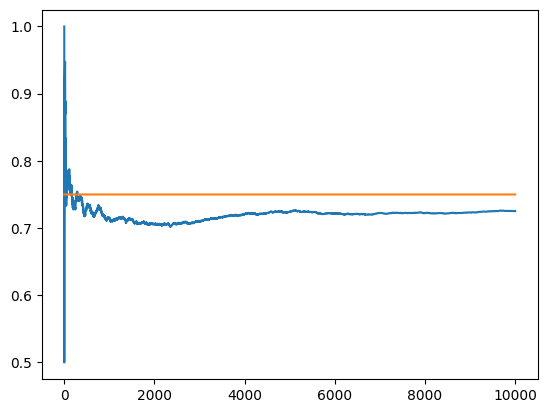

In [46]:
experiment()

In [34]:
t = True
print(id(t))

4342296856


In [35]:
t2 = True
print(id(t2))

4342296856


In [37]:
t == t2

True

In [48]:
t is t2

True

optimal j: 2
mean estimate: 0.25
mean estimate: 0.4
mean estimate: 0.7529776799119181
total reward earned: 7526.0
overall win rate: 0.7526
num_times_explored: 12
num_times_exploited: 9988
num times selected optimal bandit: 9991


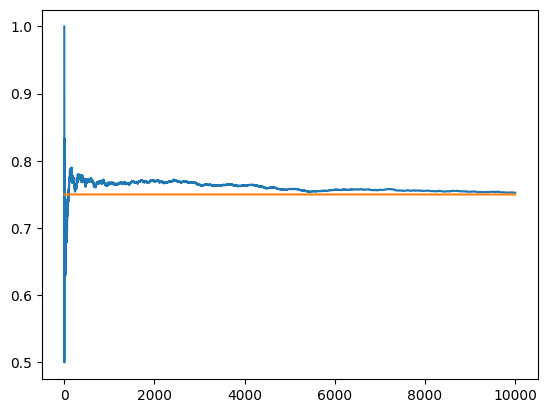

In [49]:
experiment(epsilon)